# LaMa Inference
Download `big-lama` here:
https://drive.google.com/drive/folders/1B2x7eQDgecTL0oh3LSIBDGj0fTxs6Ips

`big-lama` is the most powerful variant, pre-trained on high-resolution data.

### Check if CUDA and GPU availability

In [14]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

CUDA available: True
GPU: NVIDIA GeForce RTX 2080 Ti


In [15]:
import sys
python_exec = sys.executable

In [16]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

import subprocess

### Inference

Things to prepare:
1. Download big-lama and save to `lama/pretrained`. Files inside must have the following paths:
    * `lama/pretrained/config.yaml`
    * `lama/pretrained/models/best.ckpt`
2. In `configs`, create `predict/predict_config.yml` containing:


model:

    path: /mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting/lama/pretrained/big-lama

    checkpoint: best.ckpt

indir: /mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting/lama/input/images

outdir: outputs

refiner: 1

out_key: inpainted

dataset:

    kind: default

    img_suffix: .png

    pad_out_to_modulo: 8


3. Input files must be placed in `lama/input/images`.
    * Inputs must be: `lama/input/images/sample_name_1.png` and `lama/input/images/sample_name_1_mask.png`
    * Make sure that both are `.png`
    * Make sure that `sample_name_1_mask.png` is mode="L"

Via Terminal:

`PYTHONPATH=. python -m bin.predict   --config-path=../configs/predict   --config-name=predict_config.yml`

### Check Image Format

In [52]:
from PIL import Image

img = Image.open("lama/input/images/crack.png")
print("Image format:", img.format)

mask = Image.open("lama/input/images/crack_mask.png")
print("Mask format:", mask.format)

Image format: PNG
Mask format: PNG


### Check if file in lama directory exists

In [24]:
import os

# Inside lama/
print("From cwd=lama:")
print("Exists?", os.path.exists("lama/pretrained/big-lama/config.yaml"))

From cwd=lama:
Exists? True


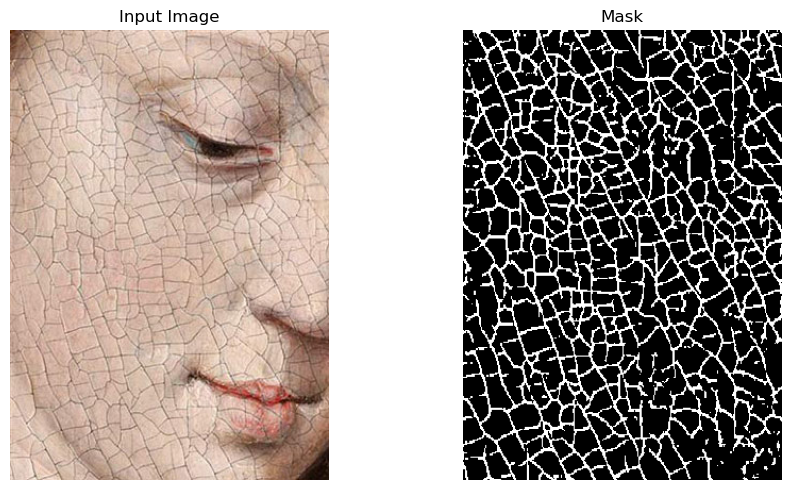

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and convert images to displayable formats
img = Image.open("lama/input/images/mask.png").convert("RGB")
mask = Image.open("lama/input/masks/mask.png").convert("L")  # grayscale mask

# Convert to numpy arrays
img_np = np.array(img)
mask_np = np.array(mask)

# Plot side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_np)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(mask_np, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")

plt.tight_layout()
plt.show()

### Check file names in a directory

In [30]:
os.getcwd()

'/mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting'

In [9]:
!ls lama/outputs/2025-06-05/18-01-46/outputs | head -n 5

00104da55f18a3846afeb74e22e1206f81323002_mask.png
00346ced5f02ab86d649edb14c6a7095d896cfeb_mask.png
003a562be2d71d0713297f7ef4297aa878373a81_mask.png
00589acd5a061063c00c824b05b75d5e3d541009_mask.png
005e5134753714d1d35c66f1dec2a7f9f637453d_mask.png
ls: write error: Broken pipe


In [38]:
!ls test/mask_backup | head -n 10

ls: cannot access 'cpt2/inpainting-dataset/test/mask': No such file or directory


#### Rename file names of imgs to {filename}

In [9]:
import os

img_dir = "test/img"

for filename in os.listdir(img_dir):
    if filename.endswith(".png"):
        # Split before the first hyphen and add .png back
        root_id = filename.split("-")[0]
        new_name = f"{root_id}.png"

        old_path = os.path.join(img_dir, filename)
        new_path = os.path.join(img_dir, new_name)

        os.rename(old_path, new_path)
        print(f"Renamed: {filename} → {new_name}")

Renamed: 395138f43730ce51e4025a0a6035e3205089bb1b-waterdiscolouration.png → 395138f43730ce51e4025a0a6035e3205089bb1b.png
Renamed: 32abb6fd24af844a3f5702e51951209343786606-no.png → 32abb6fd24af844a3f5702e51951209343786606.png
Renamed: f36ef48b0811c622b055d6addc3aed18e7d51339-waterdiscolouration.png → f36ef48b0811c622b055d6addc3aed18e7d51339.png
Renamed: 585a5870c631e11002582dc892fd0ead54244ffe-waterdiscolouration.png → 585a5870c631e11002582dc892fd0ead54244ffe.png
Renamed: 09566899f82f14b5a1f046a5488652cefcf21534-no.png → 09566899f82f14b5a1f046a5488652cefcf21534.png
Renamed: 94c39ad03da58f67cddc719111913e16d596de9b-craquelure.png → 94c39ad03da58f67cddc719111913e16d596de9b.png
Renamed: abe11d1039e3caa7ee20ba2835f872fd48312e97-no.png → abe11d1039e3caa7ee20ba2835f872fd48312e97.png
Renamed: 0b911d80c2dcf24f96125e3f512d45aa4d1113a0-no.png → 0b911d80c2dcf24f96125e3f512d45aa4d1113a0.png
Renamed: df57d07cb23fcb79c51c82e999bbddfae722f5a1-waterdiscolouration.png → df57d07cb23fcb79c51c82e999bbddfae

In [43]:
import os
import json

mask_dir = "../../../inpainting-dataset/test/mask"  # Adjust relative path
metadata = []

for fname in os.listdir(mask_dir):
    if fname.endswith("-mask.png"):
        parts = fname.split("-")
        if len(parts) < 3:
            continue  # skip malformed filenames
        image_id = parts[0]
        damage_type = parts[1]
        metadata.append({"id": image_id, "damage_type": damage_type})

# Save to JSON
with open("testset_metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print(f"Saved metadata for {len(metadata)} images.")

Saved metadata for 5186 images.


### Save metadata on damage applied to image in test set

In [46]:
import json

with open("testset_metadata.json", "r") as f:
    metadata = json.load(f)

# Show first 5 entries
for entry in metadata[:10]:
    print(entry)

{'id': 'd4fc50a10ff4b1dba5f6a933c997f20c32f2b99b', 'damage_type': 'craquelure'}
{'id': '9df5711daf724f694939b23aa5b8c6d6777929c4', 'damage_type': 'craquelure'}
{'id': 'e0b601c763919fc93ec97148569e56a3b6e2b259', 'damage_type': 'scratch'}
{'id': 'c44e4d67fd8f10cdc5ecc6f11d37ae5d66c0c9f4', 'damage_type': 'scratch'}
{'id': '4e1c6f2d76ed19a53211771c70d7f0d51853332f', 'damage_type': 'waterdiscolouration'}
{'id': 'dee56f4eec1025ea12dceecbcaca05a3914774e3', 'damage_type': 'craquelure'}
{'id': '18c4d0ba977041291ccd57a27cc3ca08db287970', 'damage_type': 'no'}
{'id': '177454a425b3897a58cf3771522f947f7ca6be19', 'damage_type': 'waterdiscolouration'}
{'id': '9df82fc7a4a3211a43811f5111c4f49331e5a6a4', 'damage_type': 'scratch'}
{'id': 'a8eb6ca5f8b03384201be23e312efb26932de158', 'damage_type': 'waterdiscolouration'}


#### Rename file names of masks to {filename}_mask

In [4]:
import os

mask_dir = "test/mask"

for filename in os.listdir(mask_dir):
    if filename.endswith("-mask.png"):
        # Split by '-' and keep the first part (the ID)
        file_id = filename.split("-")[0]
        new_name = f"{file_id}_mask.png"

        # Full paths
        old_path = os.path.join(mask_dir, filename)
        new_path = os.path.join(mask_dir, new_name)

        os.rename(old_path, new_path)
        print(f"Renamed: {filename} → {new_name}")

Renamed: d4fc50a10ff4b1dba5f6a933c997f20c32f2b99b-craquelure-mask.png → d4fc50a10ff4b1dba5f6a933c997f20c32f2b99b_mask.png
Renamed: c44e4d67fd8f10cdc5ecc6f11d37ae5d66c0c9f4-scratch-mask.png → c44e4d67fd8f10cdc5ecc6f11d37ae5d66c0c9f4_mask.png
Renamed: ee9523e0c4acf49bcff003ce48154ee660c41808-craquelure-mask.png → ee9523e0c4acf49bcff003ce48154ee660c41808_mask.png
Renamed: 2a4a9971eb1e0cb2ace7b905449b3bbb303454e1-waterdiscolouration-mask.png → 2a4a9971eb1e0cb2ace7b905449b3bbb303454e1_mask.png
Renamed: bc97172a8c19e4d6d1702ca0a4967e328784e682-scratch-mask.png → bc97172a8c19e4d6d1702ca0a4967e328784e682_mask.png
Renamed: 61914436db11cf20b42fefa8aeae5a4993da4e3b-waterdiscolouration-mask.png → 61914436db11cf20b42fefa8aeae5a4993da4e3b_mask.png
Renamed: 6a9482ac7b47ec3277360b9b343348ea704a8af3-waterdiscolouration-mask.png → 6a9482ac7b47ec3277360b9b343348ea704a8af3_mask.png
Renamed: f4878ae2f90d30d896caf08876eca584119e5f40-no-mask.png → f4878ae2f90d30d896caf08876eca584119e5f40_mask.png
Renamed: af

### Eunsure masks are binary and L mode (grayscale)

In [4]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# Set your mask directory path
mask_dir = "test/mask"

# Optional: create a backup first
os.makedirs("test/mask_backup", exist_ok=True)

# Loop through all masks
for fname in tqdm(os.listdir(mask_dir)):
    if fname.lower().endswith((".png", ".jpg", ".jpeg")):
        path = os.path.join(mask_dir, fname)

        # Backup original
        Image.open(path).save(os.path.join("test/mask_backup", fname))

        # Open and convert
        mask = Image.open(path)

        # Convert to "L" mode if needed
        if mask.mode != "L":
            mask = mask.convert("L")

        # Binarize: ensure only 0 and 255
        bin_mask = mask.point(lambda p: 255 if p > 127 else 0)

        # Save back (overwrite)
        bin_mask.save(path)


100%|██████████| 5186/5186 [03:58<00:00, 21.78it/s]


### Inference test set
Run command below on Terminal

In [ ]:
# PYTHONPATH=. python -m bin.predict --config-path=../configs/predict --config-name=predict_config.yml

### View an output

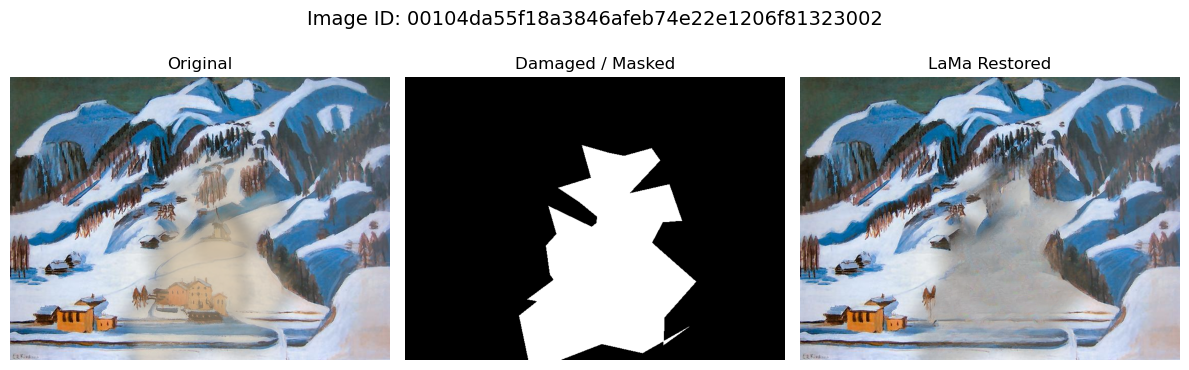

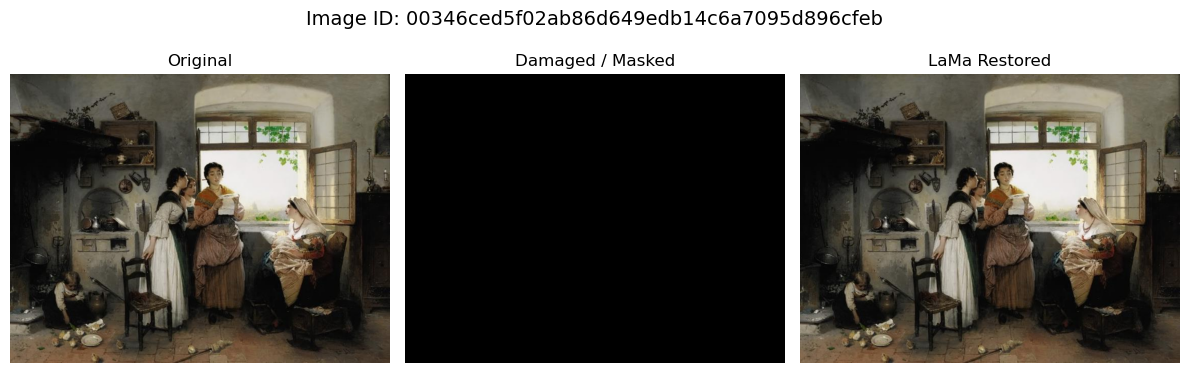

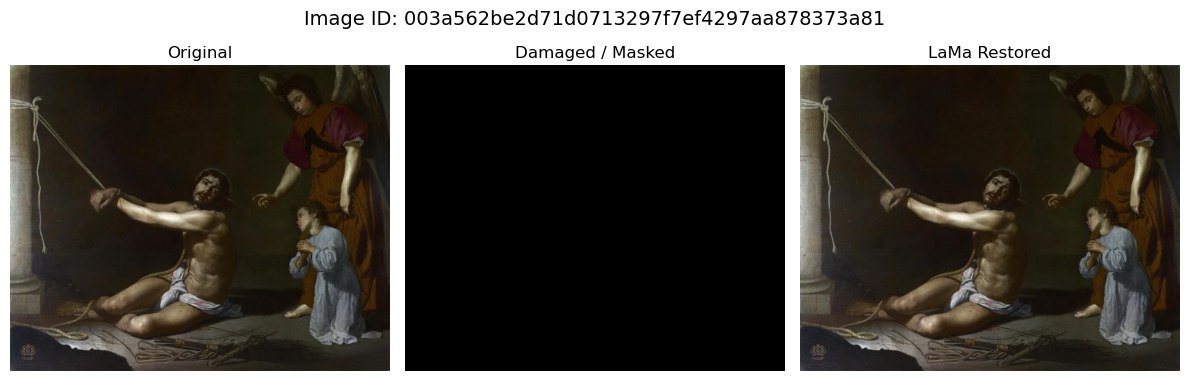

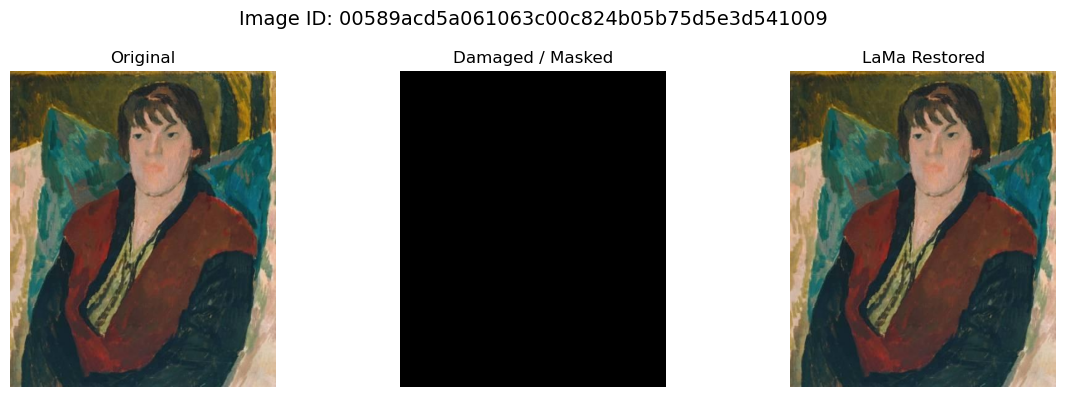

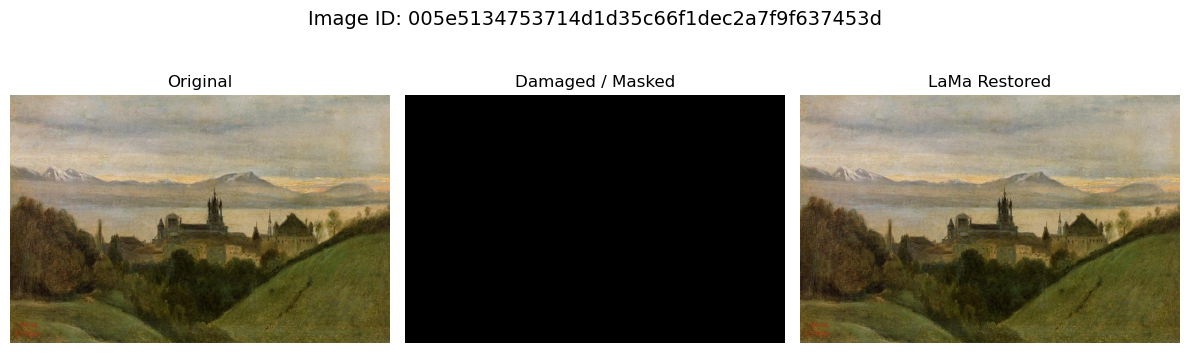

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Define paths
OUTPUT_DIR = "lama/outputs/2025-06-05/18-01-46/outputs"
INPUT_DIR = "lama/input/images"

# List of restored image filenames (e.g., abc123.png)
output_files = sorted([f for f in os.listdir(OUTPUT_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Show first N results
for fname in output_files[:5]:
    img_id = os.path.splitext(fname)[0].replace("_mask", "")

    # Paths
    orig_path = os.path.join(INPUT_DIR, f"{img_id}.png")
    mask_path = os.path.join(INPUT_DIR, f"{img_id}_mask.png")
    output_path = os.path.join(OUTPUT_DIR, fname)

    # Load images
    orig = cv2.imread(orig_path)
    mask = cv2.imread(mask_path)
    restored = cv2.imread(output_path)

    if any(x is None for x in [orig, mask, restored]):
        print(f"Missing one or more images for ID: {img_id}, skipping...")
        continue

    # Convert to RGB
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    restored = cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)

    # Plot
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Image ID: {img_id}", fontsize=14)

    plt.subplot(1, 3, 1)
    plt.imshow(orig)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.title("Damaged / Masked")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(restored)
    plt.title("LaMa Restored")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

### Compute Metrics

In [40]:
os.getcwd()

'/mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting'

In [49]:
import os

gt_dir = "../data/img/full"
gt_files = sorted(os.listdir(gt_dir))

# Show first 5 filenames
print("First 5 ground truth files:")
for fname in gt_files[:5]:
    print(fname)


First 5 ground truth files:
.ipynb_checkpoints
0005ffe7d2ad6084a5b8c7f2eca1a540c46ac431.jpg
000883c7241a279cd00acb71a1c47d70d36a2855.jpg
0009b3619f609bafa72c8177b17fdc1bfa6181ba.jpg
000a018afc23df8aca9156c95a79a983fb58d353.jpg


In [53]:
import os
import cv2
import json
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr_metric
from skimage.metrics import structural_similarity as ssim_metric

# --- File Paths ---
json_path = "testset_metadata.json"
output_dir = "lama/outputs/2025-06-05/18-01-46/outputs"
gt_dir = "../data/img/full"  # Adjust if your notebook location changes

# --- Load metadata and filter damaged entries ---
with open(json_path, "r") as f:
    metadata = json.load(f)

damaged_only = [entry for entry in metadata if entry["damage_type"] != "no"]

# --- Evaluation ---
psnr_scores = []
ssim_scores = []
results = []
skipped = []

for entry in tqdm(damaged_only):
    image_id = entry["id"]
    damage_type = entry["damage_type"]

    # --- File paths ---
    pred_path = os.path.join(output_dir, f"{image_id}_mask.png")
    gt_path_jpg = os.path.join(gt_dir, f"{image_id}.jpg")
    gt_path_png = os.path.join(gt_dir, f"{image_id}.png")

    # --- Select available ground truth ---
    if os.path.exists(gt_path_jpg):
        gt_path = gt_path_jpg
    elif os.path.exists(gt_path_png):
        gt_path = gt_path_png
    else:
        skipped.append((image_id, "missing ground truth"))
        continue

    if not os.path.exists(pred_path):
        skipped.append((image_id, "missing prediction"))
        continue

    # --- Load images ---
    pred = cv2.imread(pred_path)
    gt = cv2.imread(gt_path)

    if pred is None or gt is None:
        skipped.append((image_id, "failed to load"))
        continue

    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)

    if pred.shape != gt.shape:
        pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]))

    # --- Compute metrics ---
    psnr = psnr_metric(gt, pred, data_range=255)
    ssim = ssim_metric(gt, pred, multichannel=True, data_range=255)

    psnr_scores.append(psnr)
    ssim_scores.append(ssim)
    results.append({
        "id": image_id,
        "damage_type": damage_type,
        "psnr": psnr,
        "ssim": ssim
    })

# --- Summary ---
if psnr_scores:
    print(f"\n Evaluated {len(results)} damaged images")
    print(f"🔍 Average PSNR: {sum(psnr_scores)/len(psnr_scores):.2f}")
    print(f"🔍 Average SSIM: {sum(ssim_scores)/len(ssim_scores):.4f}")
else:
    print(" No valid images were evaluated.")

# --- Optional: Save results to CSV ---
import pandas as pd

pd.DataFrame(results).to_csv("lama/eval_damaged_only_psnr_ssim.csv", index=False)

# --- Optional: Print or save skipped files ---
if skipped:
    print(f"\ Skipped {len(skipped)} files due to issues:")
    for item in skipped[:10]:
        print(f"{item[0]} → {item[1]}")

    pd.DataFrame(skipped, columns=["id", "reason"]).to_csv("lama/skipped_eval_files.csv", index=False)


100%|██████████| 3934/3934 [11:52<00:00,  5.52it/s]



✅ Evaluated 3934 damaged images
🔍 Average PSNR: 33.61
🔍 Average SSIM: 0.9375


In [52]:
missing = []

for entry in damaged_only:
    image_id = entry["id"]
    pred_path = os.path.join(output_dir, f"{image_id}_mask.png")
    
    gt_path_png = os.path.join(gt_dir, f"{image_id}.png")
    gt_path_jpg = os.path.join(gt_dir, f"{image_id}.jpg")

    # Check prediction first
    if not os.path.exists(pred_path):
        missing.append((image_id, "❌ missing prediction"))
        continue

    # Check both ground truth formats
    if not os.path.exists(gt_path_png) and not os.path.exists(gt_path_jpg):
        missing.append((image_id, "❌ missing ground truth (.jpg/.png)"))
        continue

print(f"🔎 Total damaged IDs checked: {len(damaged_only)}")
print(f"❌ Total missing: {len(missing)} files\n")

for m in missing[:10]:
    print(f"{m[0]} → {m[1]}")


🔎 Total damaged IDs checked: 3934
❌ Total missing: 0 files

